Neste projeto de introdução ao Keras, iremos trabalhar com um e-commerce, uma loja de roupas, e toda vez que subirmos uma imagem para a plataforma, teremos que escrever se ela é uma camiseta, bota, saia, ou seja, precisamos classificar esta imagem quando a colocamos no site.

Porém temos um problema: temos 70 mil imagens de diversos tipos de roupas, então imagine rotular cada imagem para essa quantidade de imagens. Usaremos, portanto, uma outra técnica, onde em vez de indicarmos as características delas, usaremos **funções que entenderão essas imagens e extrairão características**, então não mais nomearemos, pois **essas funções é que terão que entender o que se encontra nas imagens**.

A principal diferença aqui é que agora iremos extrair as características das próprias imagens, entendendo o que existe dentro delas com funções, portanto, não iremos mais ensinar um modelo, se tratando de um **aprendizado não supervisionado**.

Iremos utilizar um conjunto de dados de imagens de roupas do próprio Keras chamado *fashion_mnist*.
https://github.com/zalandoresearch/fashion-mnist

In [14]:
# import tensorflow
# from tensorflow.python import keras

# Importando diretamente o keras para funcionar o autocomplete
import keras
import matplotlib.pyplot as plt

In [15]:
fashion_mnist = keras.datasets.fashion_mnist

# Carrega os dados
# Este dataset retorna duas tuplas de arrays com as imagens
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 60 mil imagens de treino
# A tupla significa: quantidade de imagens, número de linhas e número de colunas das imagens
# 60 mil imagens, de 28 por 28 pixels
train_images.shape

(60000, 28, 28)

In [16]:
# 10 mil imagens de teste
test_images.shape

(10000, 28, 28)

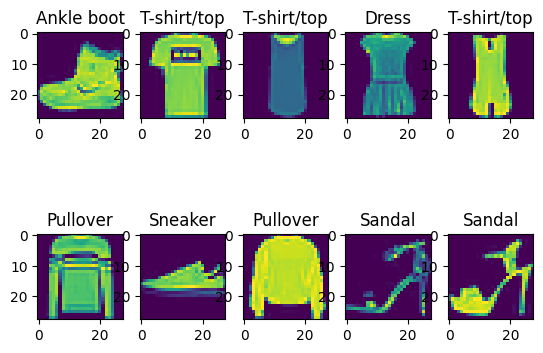

In [17]:
# Temos 10 labels
labels = ["T-shirt/top",
          "Trouser",
          "Pullover",
          "Dress",
          "Coat",
          "Sandal",
          "Shirt",
          "Sneaker",
          "Bag",
          "Ankle boot"]

for index in range(0,10):
    # 2 linhas, 5 colunas
    plt.subplot(2,5, index+1)
    plt.imshow(train_images[index])
    plt.title(labels[train_labels[index]]) # Exibe o label

# Exibe a primeira imagem do dataset de treino

### Treinando o modelo

Nosso modelo téra uma **sequência** de 3 fases que envolvem:

- Entrada (Imagens)
- Processamento
- Saída (Classificação de cada roupa)

Em Keras, uma rede neural é definida empilhando camadas.

As imagens são matrizes que contem *28x28 pixels*, após o *achatamento* (**flatten**) das imagens nas camadas, cada matriz de imagem será **transformado em um vetor** com 784 de comprimento (28x28 = 784).

Abaixo criaremos uma camada em um modelo sequêncial de 3 passos.

**Criando a camada 0**

- Uma camada é uma estrutura na rede neural onde ocorre algum tipo de processamento nos dados.
- É possível ter diferentes funções, como transformar, aprender padrões ou reduzir informações.

**Exemplos de camadas:**
- **Dense**: Camada totalmente conectada onde cada neurônio recebe informações de todos os neurônios da camada anterior.
- **Conv2D (Convolutional Layers)**: Para processamento de imagens, usada para detectar padrões como bordas, texturas, etc.
- **MaxPooling2D**: Para reduzir o tamanho espacial das representações em redes convolucionais.
- **LSTM/GRU**: Para dados sequencias, como séries temporais ou texto.
- **BatchNormalization**: Para normalizar os dados na rede, acelerando o treinamento.
- **Dropout**: Usada para reduzir o overfitting, desativando aleatoriamente neurônios durante o treinamento.

In [18]:
# Criando a sequência do modelo
model = keras.Sequential()

# No primeiro passo, precisamos definir que o formato das entradas (imagens) terão 28x28 pixels
# Em seguida, "achataremos" a imagem de 2 dimensões para apenas uma única dimensão (transformamos em um vetor)
model.add(keras.layers.Flatten(input_shape=(28,28)))

**Criando a camada 1**

Iremos criar uma camada do tipo *dense* (densa), que seria uma camada totalmente conectada, este é o tipo mais básico e comum em redes neuras, exemplo:

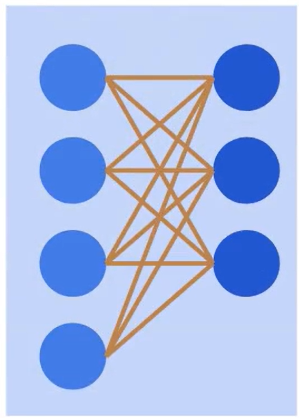

- As bolinhas são chamadas de **neurônios** ou **nós** de uma rede neural.
- Uma **rede densa** significa que **todos os neurônios são conectados**.

Para definir quantos **neurônios** terá no nosso modelo utilizamos a função *Dense*. Cada neurônio em uma camada **processa uma entrada** e **gera uma saída** que pode ser utilizada como entrada para a próxima camada.

O ideal é que a quantidade de neurônios seja um número multiplo de 2.

Após a definição da quantidade de neurônios, é necessário definir a **função de ativação**: 
- São operações matemáticas aplicadas à saida de cada neurônio.
- Determinam como os sinais (ou informações) passam de uma camada para outra na rede.
- Sem uma função de ativação, a rede seria linear, incapaz de aprender padrões complexos.

In [19]:
model.add(keras.layers.Dense(256, activation='relu'))